In [1]:
# https://colab.research.google.com/drive/1D0J2UK4hXAlwpy5NeD4-6lq-ClJJxSwW?usp=sharing

import pandas as pd
# قراءة التغريدات وتحميلها ضمن إطار من البيانات 
tweets = pd.read_csv('tweets.csv',encoding = "utf-8")
# إظهار الجزء الأعلى من إطار البيانات
tweets.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @Alhilal_FC: ⏰ بداية الشوط الثاني\n#الهلال ...,Sports
2,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
3,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
4,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports


In [2]:
print('Data size:', tweets.shape)

Data size: (26748, 2)


In [3]:
# مكتبة  السلاسل النصية 
import string
# مكتبة التعابير النظامية
import re
# مكتبة معالجة اللغات الطبيعية
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
# مكتبة  كلمات التوقف
from nltk.corpus import stopwords
# مكتبة استخراج الوحدات
from nltk.tokenize import word_tokenize
# مكتبة المجذع العربي
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

# دالة حذف المحارف غير اللازمة
def remove_chars(text, del_chars):
    translator = str.maketrans('', '', del_chars)
    return text.translate(translator)
# دالة حذف المحارف المكررة
def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

# دالة تنظيف التغريدات
def clean_tweet(tweet):
    stop_words = stopwords.words('arabic')
    # محارف الرموز التعبيرية  
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    tweet = str(tweet)
    # حذف @ وما يتبعها
    tweet = re.sub("@[^\s]+","",tweet) 
    tweet = re.sub("RT","",tweet) 
    # حذف الروابط
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    # حذف الرموز التعبيرية
    tweet =  re.sub(emoj, '', tweet)
    # حذف كلمات التوقف
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words) 
    # حذف الإشارات #
    tweet = tweet.replace("#", "").replace("_", " ") 
    # حذف الأرقام
    tweet = re.sub(r'[0-9]+', '', tweet)  
    # حذف المحارف غير اللازمة
    # علامات الترقيم العربية
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    # علامات الترقيم الانكليزية
    english_punctuations = string.punctuation
    # دمج علامات الترقيم العربية والانكليزية
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
    # حذف المحارف المكررة  
    tweet = remove_repeating_char(tweet)
    # استبدال الأسطر الجديدة بفراغات  
    tweet = tweet.replace('\n', ' ')  
    # حذف الفراغات الزائدة من اليمين واليسار   
    tweet = tweet.strip(' ')  
    return tweet

# دالة تقسيم النص إلى مجموعة من الوحدات
def tokenizingText(text): 
    tokens_list = word_tokenize(text) 
    return tokens_list

# دالة حذف كلمات التوقف
def filteringText(tokens_list):  
    # قائمة كلمات التوقف العربية
    listStopwords = set(stopwords.words('arabic'))
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    tokens_list = filtered 
    return tokens_list

# دالة التجذيع  
def stemmingText(tokens_list): 
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list
    
# دالة دمج قائمة من الكلمات في جملة
def toSentence(words_list):  
    sentence = ' '.join(word for word in words_list)
    return sentence

In [4]:
# مثال
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "
print(text)
text=clean_tweet(text)
print(text)
tokens_list=tokenizingText(text)
print(tokens_list)
tokens_list=filteringText(tokens_list)
print(tokens_list)
tokens_list=stemmingText(tokens_list)
print(tokens_list)

أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  
أحب الذهاب الحديقة  يوم  صباحاً رفاقي هؤلاء
['أحب', 'الذهاب', 'الحديقة', 'يوم', 'صباحاً', 'رفاقي', 'هؤلاء']
['أحب', 'الذهاب', 'الحديقة', 'يوم', 'صباحاً', 'رفاقي']
['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [5]:
# دالة معالجة التغريدات
def process_tweet(tweet):
    # تنظيف التغريدة
    tweet=clean_tweet(tweet)
    # التحويل إلى وحدات
    tweet=tokenizingText(tweet)
    # التجذيع
    tweet=stemmingText(tweet)
    return tweet

# المعالجة الأولية للتغريدات 
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

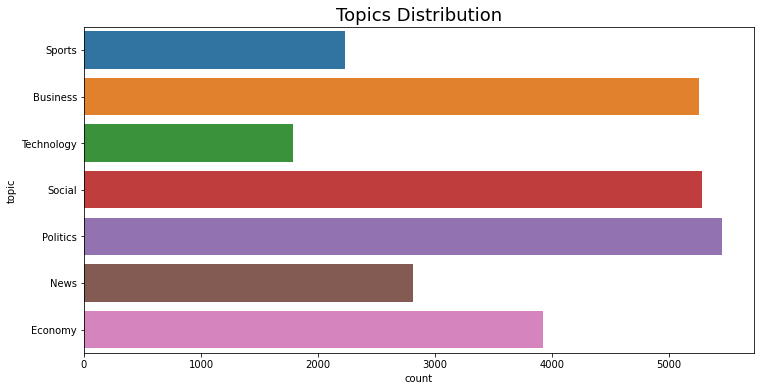

In [6]:
# مكتبات الرسم
import matplotlib.pyplot as plt
import seaborn as sns
# حجم الرسم
plt.figure(figsize=(12, 6))
# رسم عدد كل صف
sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution', fontsize=18)

plt.show()

In [7]:
# استيراد مكتبة الموازنة
from imblearn.over_sampling import RandomOverSampler
# إنشاء غرض من الصف
oversample = RandomOverSampler()
# توليد سطر عشوائي
tweets = tweets.sample(frac=1)
# توليد الأسطر الجديدة
tweets, Y = oversample.fit_resample(tweets, tweets.topic)

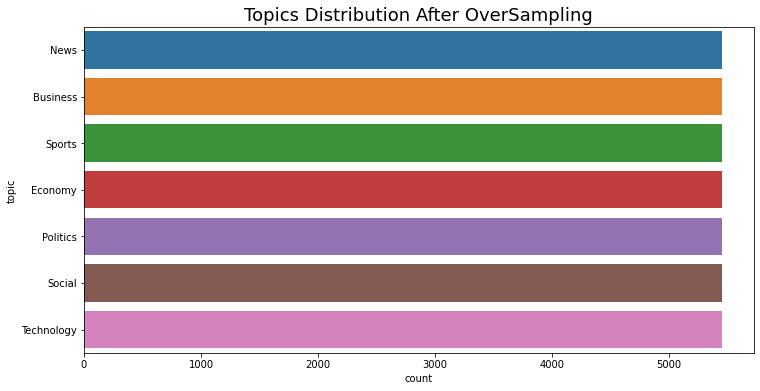

In [8]:
# إعادة رسم أعداد الصفوف
# بعد الموازنة
plt.figure(figsize=(12, 6))
sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution After OverSampling', fontsize=18)

plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
# ترميز الصفوف
le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)

classes = le_topics.classes_ # الصفوف

n_classes = len(classes) # عدد الصفوف
print("No. of classes:", n_classes)
print("Classes:", classes)
print("Coding: ", le_topics.transform(classes))

No. of classes: 7
Classes: ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# نركيب جمل التغريدات من المفردات المعالجة
sentences = tweets['tweet'].apply(toSentence)
print(sentences[6]) 
# عدد الكلمات الأعظمي ذات التواتر الأكبر
# التي ستُستخدم
max_words = 5000
# الطول الأعظمي لشعاع الأرقام
max_len = 50
#   التصريح عن المجزئ 
#   مع تحديد عدد الكلمات التي ستبقى 
#  بالاعتماد على تواترها 
tokenizer = Tokenizer(num_words=max_words )
# ملائمة المجزئ لنصوص التغريدات
print(sentences[0])
tokenizer.fit_on_texts(sentences)
# تحويل النص إلى قائمة من الأرقام
S = tokenizer.texts_to_sequences(sentences)
print(S[0]) 
# توحيد أطوال الأشعة
X = pad_sequences(S, maxlen=max_len)
print(X[0]) 
X.shape

اخو سيس ده مش يعرف يتكلم اصل حرج عل مريض
اذا خلص اكسج وين نتنفس
[88, 1529, 440]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   88 1529  440]


(38150, 50)

In [11]:
# توليد شعاع الخرج
y = tweets['topic']

# مكنبة تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train[0])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   74  111    1  856    1   83 1935
   49 1718  359 4899 2382  325  796  421]
(30520, 50) (30520,)
(7630, 50) (7630,)


In [12]:
# تضمين النموذج التسلسلي
from keras.models import Sequential
# تضمين  الطبقات اللازمة
from keras.layers import Embedding, Dense, LSTM
# دوال التحسين
from tensorflow.keras.optimizers import Adam, RMSprop 

# التصريح عن دالة إنشاء نموذج التعلم
# مع إعطاء قيم أولية للمعاملات المترفعة
def create_model(embed_dim = 32, hidden_unit = 16, dropout_rate = 0.2, 
optimizers = RMSprop, learning_rate = 0.001):
    # التصريح عن نموذج تسلسلي
    model = Sequential()
    # طبقة التضمين
    model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))
    # LSTM
    model.add(LSTM(units = hidden_unit ,dropout=dropout_rate))
    # الطبقة الأخيرة
    model.add(Dense(units = len(classes), activation = 'softmax'))
    # يناء النموذج
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
    # طباعة ملخص النموذج
    print(model.summary())
 
    return model

In [13]:
# مكتبة التصنيف
from keras.wrappers.scikit_learn import KerasClassifier

# إنشاء النموذج مع قيم المعاملات المترفعة الأمثلية

model = KerasClassifier(build_fn = create_model,
                        # معاملات النموذج
                        dropout_rate = 0.2,
                        embed_dim = 32,
                        hidden_unit = 64,
                        optimizers = Adam,
                        learning_rate = 0.001,
                        # معاملات التدريب
                        epochs=10, 
                        batch_size=256,
                        # نسبة بيانات التقييم
                        validation_split = 0.1)
# ملائمة النموذج مع بيانات التدريب
model_prediction = model.fit(X_train, y_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 7)                 455       
Total params: 185,287
Trainable params: 185,287
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
108/108 [==============================] - 6s 17ms/step - loss: 1.4219 - accuracy: 0.5296 - val_loss: 0.7994 - val_accuracy: 0.7415
Epoch 2/10
108/108 [==============================] - 1s 11ms/step - loss: 0.5800 - accuracy: 0.8117 - val_loss: 0.5169 - val_accuracy: 0.8283
Epoch 3/10
108/108 [==============================] - 1s 11ms/step - loss: 0.3838 - accur

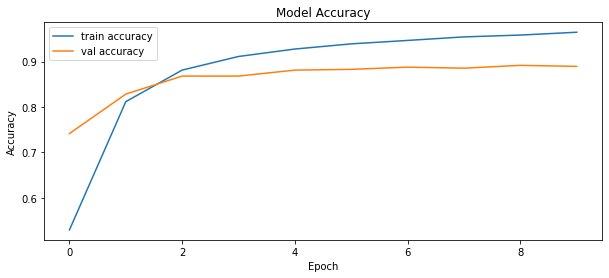

In [14]:
# معاينة دقة النموذج
# التدريب والتقييم
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [15]:
# مقاييس الأداء

# مقياس الصحة
from sklearn.metrics import accuracy_score 
# مقياس الدقة
from sklearn.metrics import precision_score
# مقياس الاستذكار
from sklearn.metrics import recall_score
# f1
from sklearn.metrics import f1_score
# مصفوفة الارتباك
from sklearn.metrics import confusion_matrix
# تصنيف بيانات الاختبار
y_pred = model.predict(X_test)
# حساب مقاييس الأداء
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred , average='weighted')
recall= recall_score(y_test, y_pred, zero_division=1, average='weighted')
f1= f1_score(y_test, y_pred, zero_division=1,  average='weighted')

print('Model Accuracy on Test Data: {:.2f}'.format(accuracy*100))
print('Model Precision on Test Data: {:.2f}'.format(precision*100))
print('Model Recall on Test Data: {:.2f}'.format(recall*100))
print('Model F1 on Test Data: {:.2f}'.format(f1*100))

confusion_matrix(y_test, y_pred)


Model Accuracy on Test Data: 89.96
Model Precision on Test Data: 89.94
Model Recall on Test Data: 89.96
Model F1 on Test Data: 89.91


array([[ 958,   17,   16,   49,   15,    5,   27],
       [  19,  987,    8,   14,   14,   14,   18],
       [  19,   18, 1006,   41,   15,   15,   14],
       [  89,   23,   50,  867,   57,    9,   11],
       [  27,   23,    6,   25,  994,    4,    7],
       [   3,    9,    2,    3,   21, 1005,    9],
       [  15,   15,    9,    1,    3,    7, 1047]], dtype=int64)

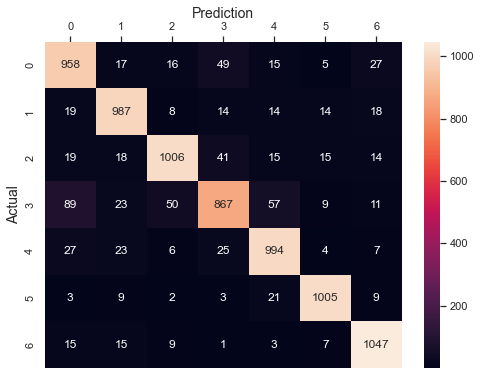

In [16]:
# رسم مصفوفة الارتباك
import seaborn as sns
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_ylabel('Actual', fontsize = 14)
plt.show()

In [17]:
# مقاييس الأداء في حالة أكثر من صفين
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# تقرير التصنيف
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes))


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

    Business       0.85      0.88      0.86      1087
     Economy       0.90      0.92      0.91      1074
        News       0.92      0.89      0.90      1128
    Politics       0.87      0.78      0.82      1106
      Social       0.89      0.92      0.90      1086
      Sports       0.95      0.96      0.95      1052
  Technology       0.92      0.95      0.94      1097

    accuracy                           0.90      7630
   macro avg       0.90      0.90      0.90      7630
weighted avg       0.90      0.90      0.90      7630



In [18]:
# دالة تصنيف تغريدة
def classify_tweet(tweet):
    # تحويل شعاع الكلمات إلى جملة
    tweet = toSentence(tweet)
    # وضع الجملة في شعاع
    ar=[]
    ar.append(tweet)
    # تحويل النص إلى قائمة من الأرقام
    seq = tokenizer.texts_to_sequences(ar)
    # توحيد طول المتجهة الرقمية
    pseq = pad_sequences(seq, maxlen=max_len)
    # استدعاء دالة التنبؤ للنموذج
    pred = model.predict(pseq)
    return pred

{'Social': 145, 'Sports': 112, 'Economy': 47, 'Business': 30}
salem is classified as :
Social ( 43.41 %)
Sports ( 33.53 %)
Economy ( 14.07 %)
Business ( 8.98 %)


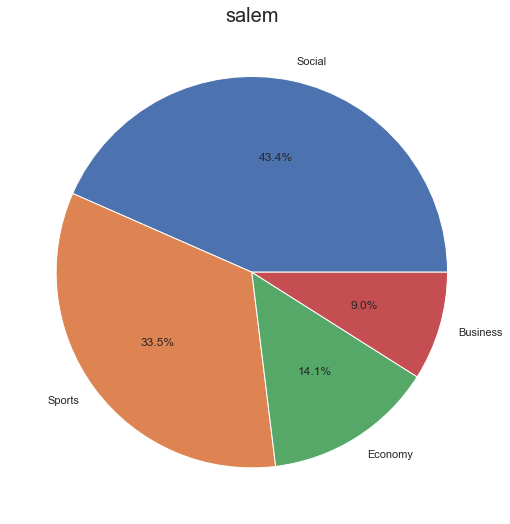

In [19]:
# دالة تصنيف الشخص
def classify_person(person_name):
    # تحميل تغريدات الشخص
    # في إطار بيانات
    path = person_name + '.csv'
    df = pd.read_csv(path)
    # إنشاء قاموس لعد
    # التغريدات من كل صف
    classes_count=dict()
    # إعطاء قيم ابتدائيه 0
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0
    # الحد الأدنى لطول التغريدة
    min_tweet_len=5

    total=0
    for _, row in df.iterrows():
        tweet=row['tweet']
        # تنظيف التغريدة
        processed_tweet=process_tweet(tweet)
        if len(processed_tweet)>min_tweet_len:
          # تصنيف التغريدة
          c= classify_tweet(processed_tweet)
          # إيجاد اسم الصف من رمزه
          topic=le_topics.inverse_transform(c)[0]
          # إضافة 1 للصف الموافق
          classes_count[topic]=classes_count[topic]+1
          total=total+1

    # ترتيب الصفوف وفق العدد
    # تنازلياً

    sorted_classes = sorted(classes_count, key=classes_count.get,reverse=True)  
 
    # القاموس النهائي
    sorted_classes_cleaned = {}
    min_display=total/25
    # إهمال الصفوف ذات العدد الصغير
    for w in sorted_classes:
      if classes_count[w]>min_display:
        sorted_classes_cleaned[w] = classes_count[w]

    # طباعة النتائج
    print(sorted_classes_cleaned) 
    n=0
    for key, value in sorted_classes_cleaned.items():
      n=n+value

    print(person_name, "is classified as :")
    for key, value in sorted_classes_cleaned.items():  
      print(key, "(", "{:.2f}".format((value/n)*100) , "%)")
        
    # رسم فطيرة أعداد الصفوف
    x = sorted_classes_cleaned.keys()
    y = sorted_classes_cleaned.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(9,9));
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()
# مثال
classify_person("salem")